# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis

In [70]:
reload(mdl)
reload(agt)

reload(mdl)
reload(agt)

<module 'agent' from 'd:\\GitHub\\agent-based-modelling\\Project\\agent.py'>

d:\GitHub\agent-based-modelling\Project\model.py:47: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  # substrate = np.random.randint(max_substrate)
d:\GitHub\agent-based-modelling\Project\model.py:51: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  


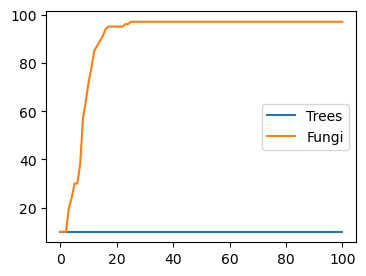

0     181.000000
1     404.265366
2     922.773740
3    2145.508760
4    5063.147712
Name: Living Trees Total Volume, dtype: float64


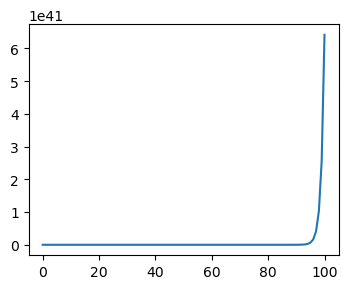

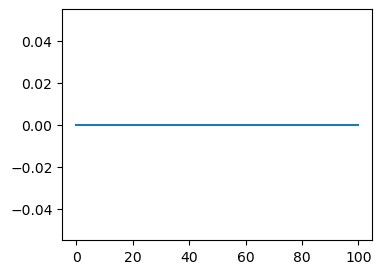

In [72]:
%matplotlib inline

width = 10
height = 10
n_init_trees = 10
n_init_fungi = 10
model = mdl.Forest(width, height, n_init_trees, n_init_fungi)
model.run_model()

data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Trees", "Fungi"]].plot(ax=ax)
plt.show()

print(data["Living Trees Total Volume"].head())

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Living Trees Total Volume"].plot(ax=ax)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Infected Trees"].plot(ax=ax)
plt.show()

In [ ]:
reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [ ]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi"])

d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position [3 2]. In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 2 is being placed with
place_agent() despite already having the position [1 9]. In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 3 is being placed with
place_agent() despite already having the position [0 7]. In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 4 is being placed with
place

Cannot show ipywidgets in text

d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 101 is being placed with
place_agent() despite already having the position (2, 7). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 102 is being placed with
place_agent() despite already having the position (5, 8). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 103 is being placed with
place_agent() despite already having the position (7, 7). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(new_agent, pos)
d:\GitHub\agent-based-modelling\Project\model.py:81: UserWarning: Agent 104 is being placed